# **Phishing Website Detection**

**INTRODCTION**

Phishing Website is the most commonly used social engineering and cyber attack. Through such attacks, the phisher targets naive online users by tricking them into revealing confidential information, with the purpose of using it fraudulently.
Detect them in their early appearance, using machine learning  algorithms.
Of the below four, the machine learning based method is proven to be most effective than the other methods.
Even then, online users are still being trapped into revealing sensitive information in phishing websites.




**GOAL**
*   The primary objective is to build a machine learning model that can accurately identify phishing websites from legitimate ones.  This is crucial for safeguarding online users from potential scams and data breaches.


**Attribute Information**

* The dataset comprises 11,055 entries and 32 columns (features).
* Each row represents a website.
* The columns represent different characteristics or features that can be extracted from a website's URL or content (e.g., whether the website uses SSL, the presence of pop-up windows, etc.).  
* The `Result` column is the target variable. It signifies whether a website is legitimate (1) or a phishing site (-1).


*   For the further information about the features see the features file -- [data](https://docs.google.com/document/d/1_5vUBDJphkw97EBUoZVQkE1734p6UpRJ/edit?usp=sharing&ouid=113280984735948194035&rtpof=true&sd=true)

* Dataset -- [Dataset](https://drive.google.com/file/d/1flQxTNFsrPwIgr9XidGduZb76KnoyXQ3/view?usp=sharing)

* Source of the data [openml](https://www.openml.org/)

#**Import Libraries**  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import joblib

**Importing necessary libraries**

* pandas and numpy: for data manipulation and numerical operations.
* matplotlib and seaborn: for visualizations.
* StandardScaler: for standardizing feature values.
* imblearn's SMOTE: to balance the target classes via oversampling.
* train_test_split: for splitting the dataset into training and testing sets.
* Pipeline: for organizing preprocessing and model training steps into a single workflow.
* GridSearchCV: for hyperparameter tuning with cross-validation.
* XGBoost: provides an optimized gradient boosting algorithm for better performance in classification tasks.
* accuracy_score, classification_report, confusion_matrix, f1_score: metrics for evaluating model performance.
* joblib: for saving and loading trained models.

In [ ]:
data = pd.read_csv('/content/csv_result-phpV5QYya.csv')
data.head()

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [ ]:
unseen_df = data.sample(frac=0.01,random_state=42)
unseen_df.to_csv('Unseen_data.csv',index=False)
data.drop(unseen_df.index,inplace=True)
unseen_df.shape,data.shape

((108, 31), (10727, 31))

Unseen data for validation

   It loads the phishing website dataset from a CSV file into a Pandas DataFrame.  `data.head()` displays the first few rows of the data.


#  **Exploratory Data Analysis (EDA):**


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10944 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   id                           10944 non-null  int64
 1   having_IP_Address            10944 non-null  int64
 2   URL_Length                   10944 non-null  int64
 3   Shortining_Service           10944 non-null  int64
 4   having_At_Symbol             10944 non-null  int64
 5   double_slash_redirecting     10944 non-null  int64
 6   Prefix_Suffix                10944 non-null  int64
 7   having_Sub_Domain            10944 non-null  int64
 8   SSLfinal_State               10944 non-null  int64
 9   Domain_registeration_length  10944 non-null  int64
 10  Favicon                      10944 non-null  int64
 11  port                         10944 non-null  int64
 12  HTTPS_token                  10944 non-null  int64
 13  Request_URL                  10944 non-null  int64


In [ ]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique value in {column}     :" ,unique_values)


Unique value in id     : [    1     2     3 ... 11053 11054 11055]
Unique value in having_IP_Address     : [-1  1]
Unique value in URL_Length     : [ 1  0 -1]
Unique value in Shortining_Service     : [ 1 -1]
Unique value in having_At_Symbol     : [ 1 -1]
Unique value in double_slash_redirecting     : [-1  1]
Unique value in Prefix_Suffix     : [-1  1]
Unique value in having_Sub_Domain     : [-1  0  1]
Unique value in SSLfinal_State     : [-1  1  0]
Unique value in Domain_registeration_length     : [-1  1]
Unique value in Favicon     : [ 1 -1]
Unique value in port     : [ 1 -1]
Unique value in HTTPS_token     : [-1  1]
Unique value in Request_URL     : [ 1 -1]
Unique value in URL_of_Anchor     : [-1  0  1]
Unique value in Links_in_tags     : [ 1 -1  0]
Unique value in SFH     : [-1  1  0]
Unique value in Submitting_to_email     : [-1  1]
Unique value in Abnormal_URL     : [-1  1]
Unique value in Redirect     : [0 1]
Unique value in on_mouseover     : [ 1 -1]
Unique value in RightClick  

   * **Data Inspection:** The code explores the dataset's structure (e.g., `data.info()`) and unique values within each column.


* The dataset has 11,055 entries and 32 columns.

* Columns represent features with integer values (-1, 0, or 1)
* The Result (Target) column likely represents the target variable for classification (values of -1 and 1).


According to the Data descrition, these are the meaning of the values in the data

* 1 means legitimate
* 0 is suspicious
* -1 is phishing

In [ ]:
data.drop('id',axis=1,inplace=True)

The id column is dropped because it does not provide useful information for modeling

In [ ]:
data.isnull().sum()

,0
having_IP_Address,0
URL_Length,0
Shortining_Service,0
having_At_Symbol,0
double_slash_redirecting,0
Prefix_Suffix,0
having_Sub_Domain,0
SSLfinal_State,0
Domain_registeration_length,0
Favicon,0


 This code checks for missing values in each column, ensuring data completeness before processing further
 as you we can see there is no missing values

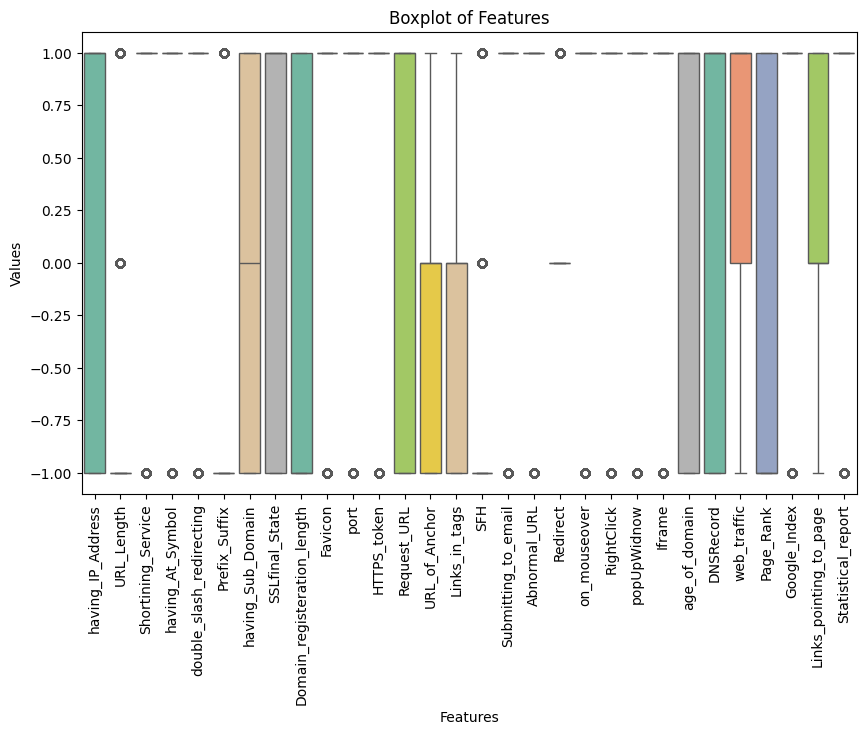

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data.drop('Result',axis=1),palette='Set2')
plt.title('Boxplot of Features')
plt.xticks(rotation = 90)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Features')
plt.show()

This boxplot provides a visual representation of the spread and outliers in the feature values, making it easier to detect extreme values.

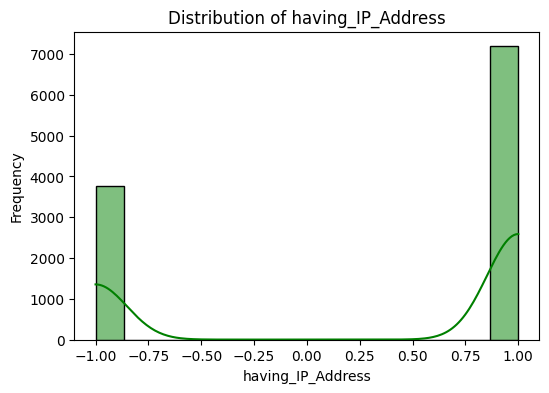

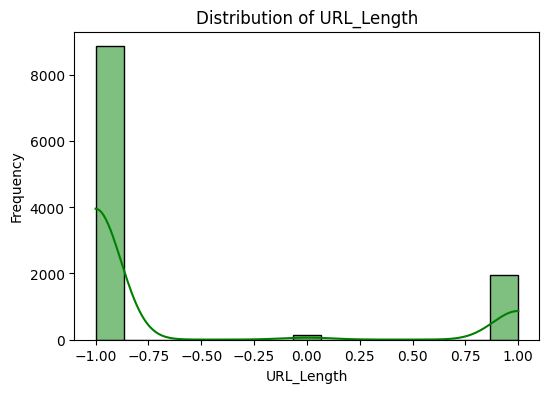

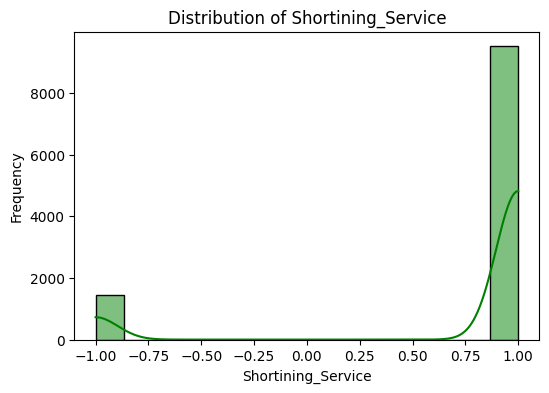

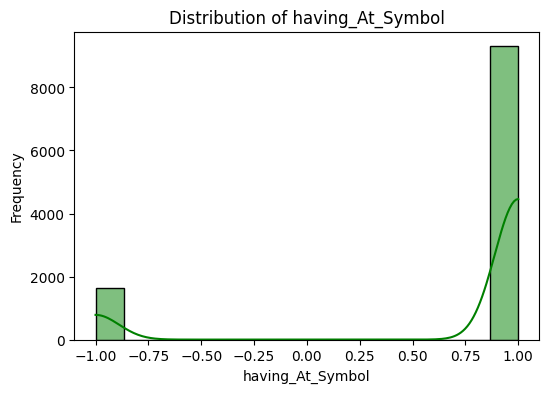

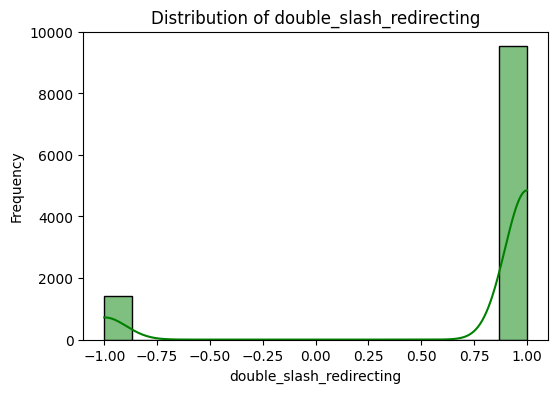

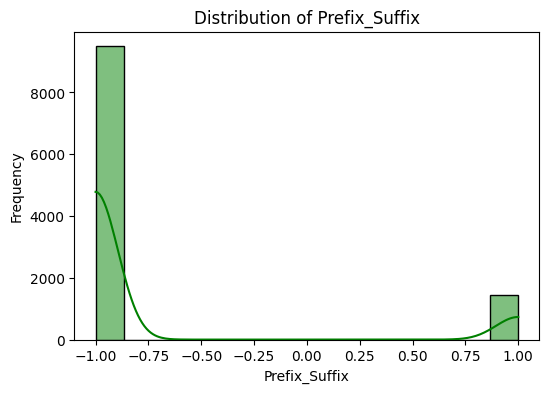

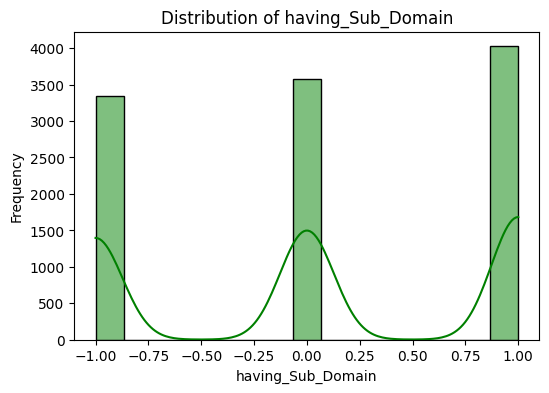

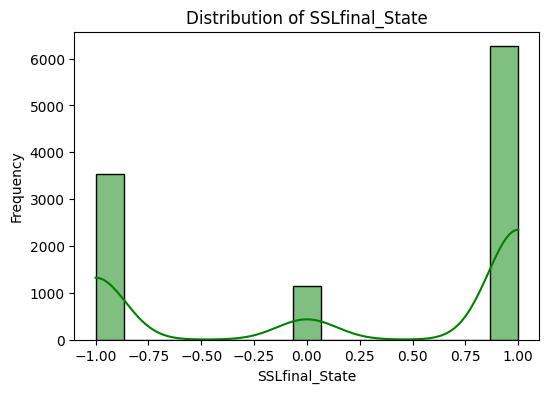

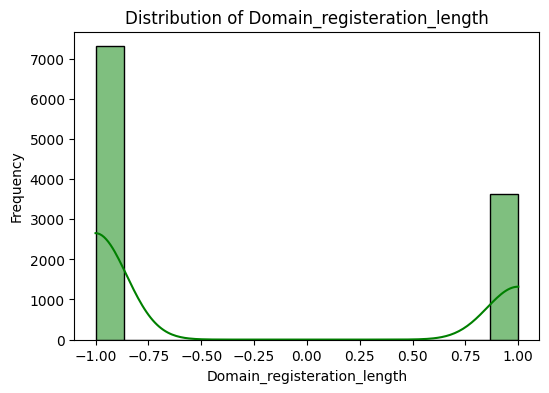

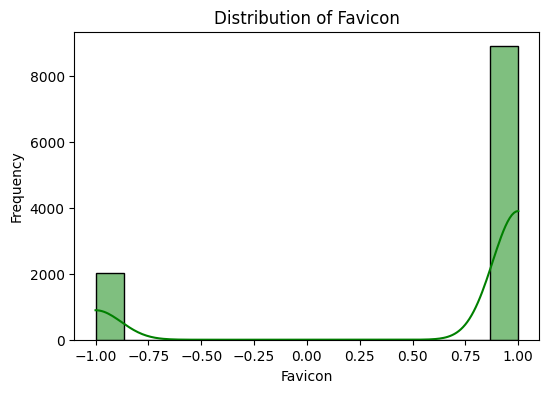

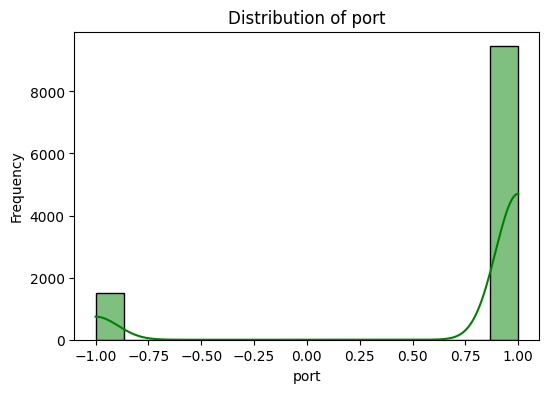

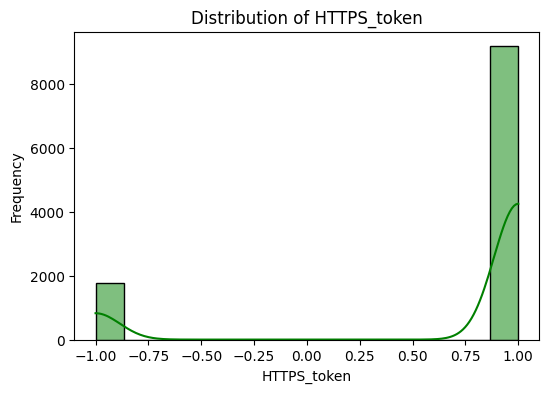

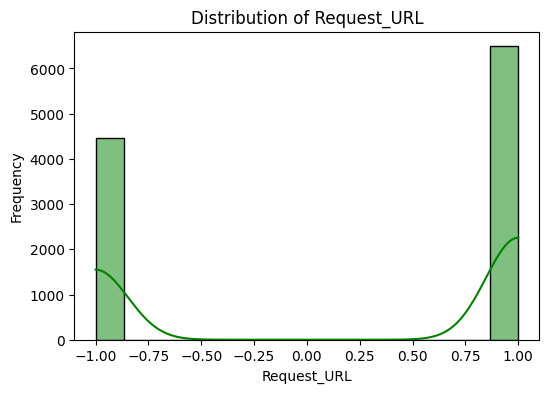

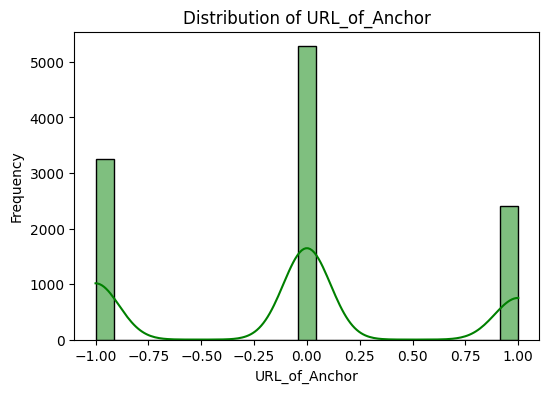

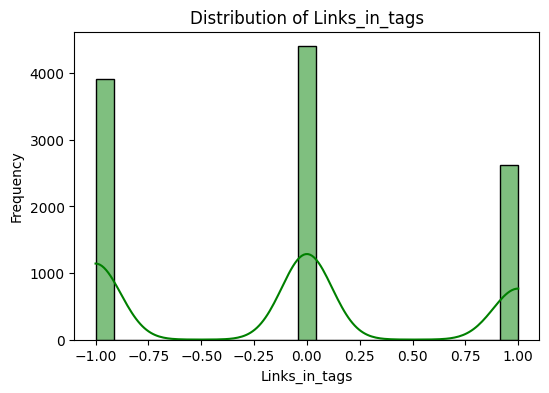

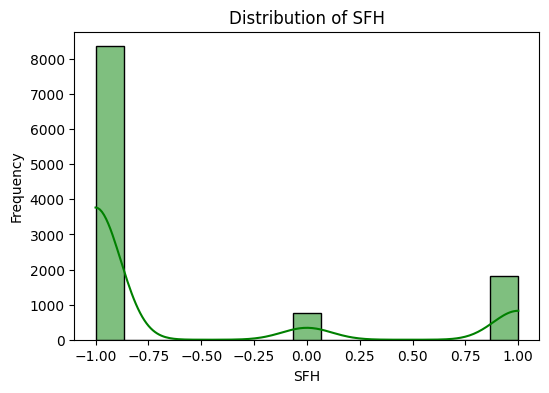

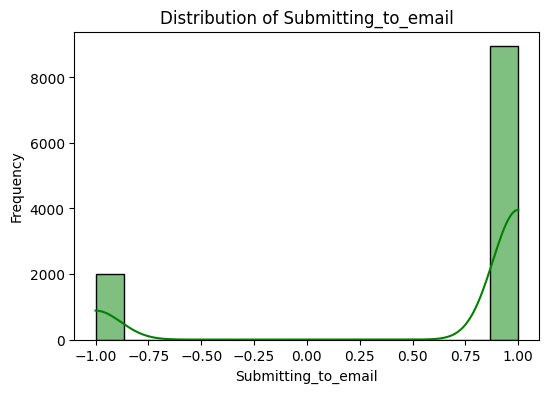

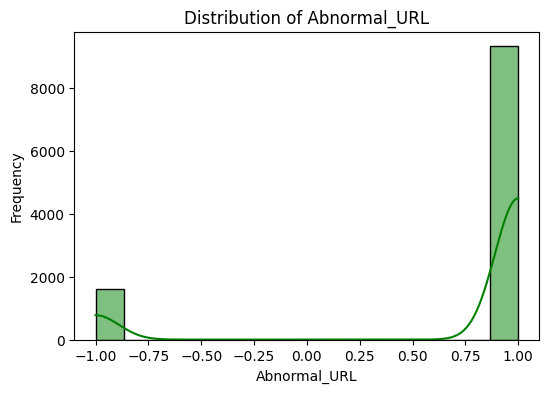

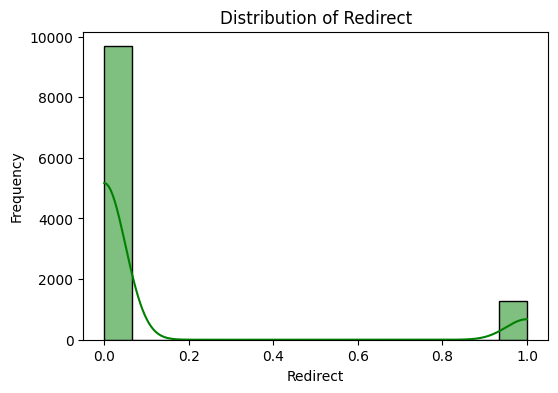

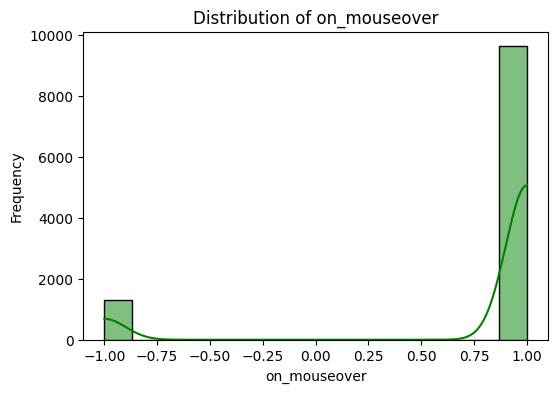

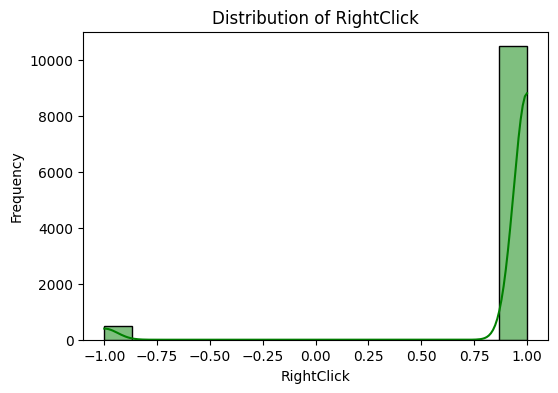

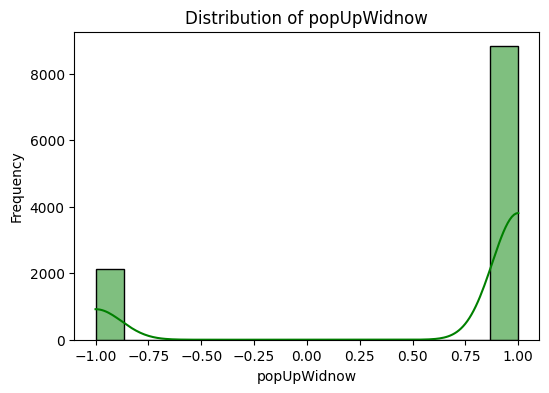

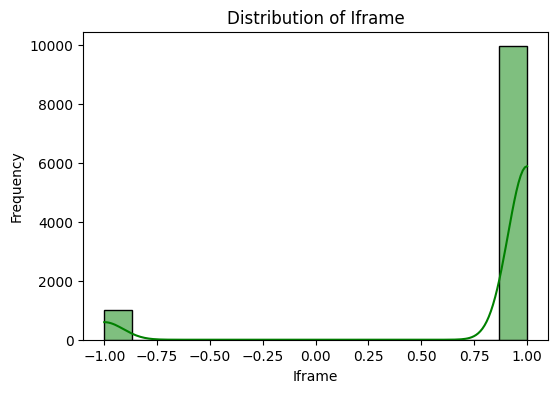

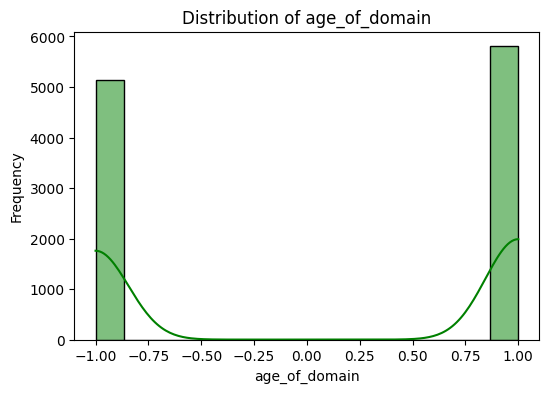

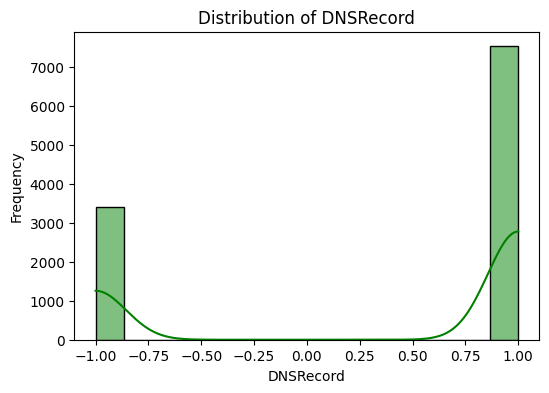

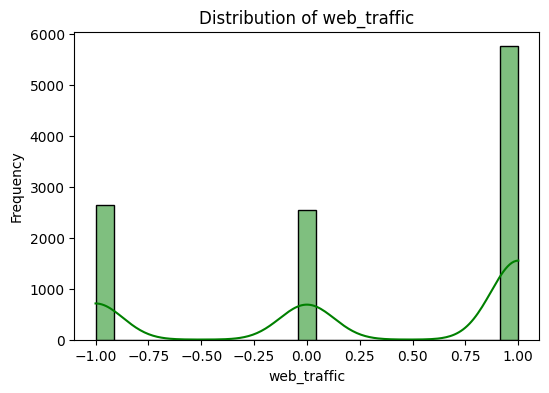

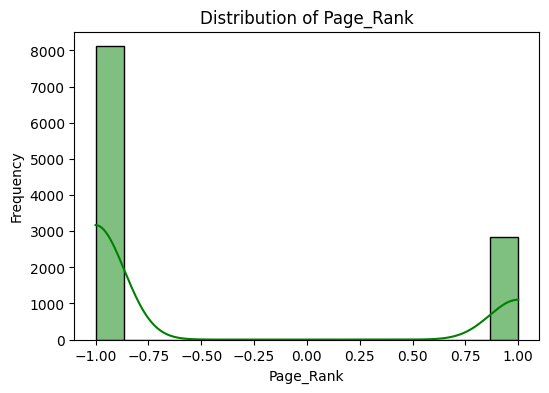

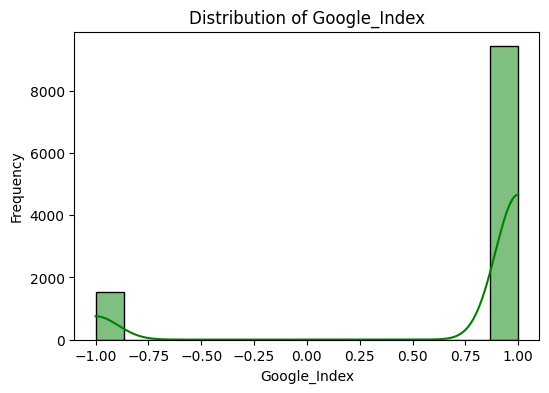

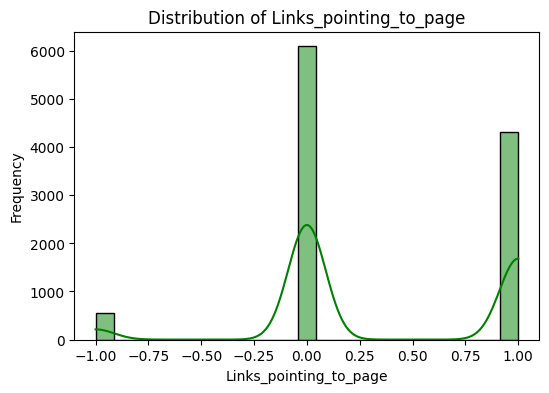

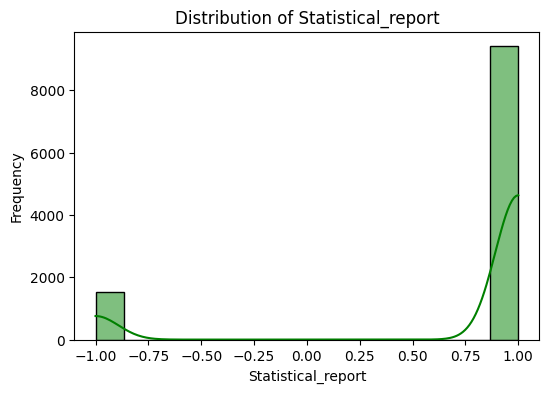

In [ ]:
for column in data.drop('Result',axis=1).columns:
  plt.figure(figsize=(6,4))
  sns.histplot(data[column],kde=True,color='green')
  plt.title(f'Distribution of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()


This loop creates a histogram for each feature, showing the distribution of values, which can reveal skewness, multimodality, or other patterns.



The features show a high level of skewness, likely due to the imbalance in the data distribution.

* **Target Variable Distribution**

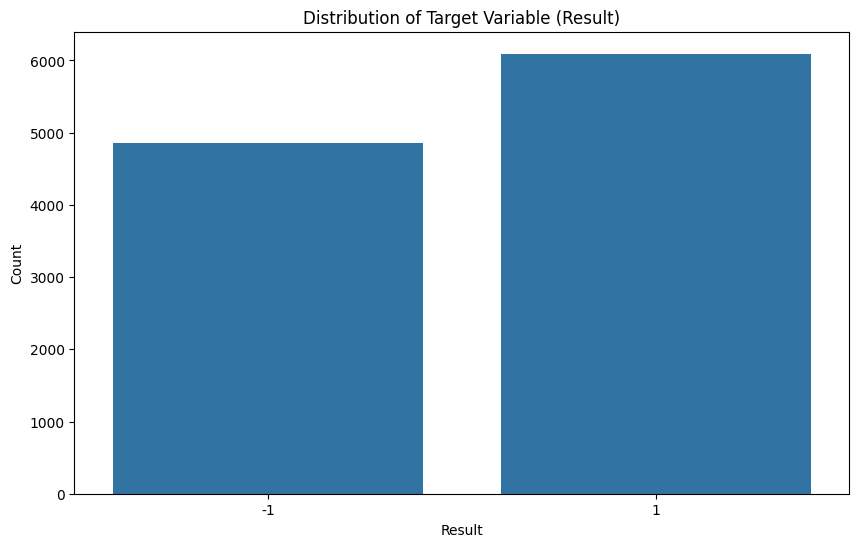

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x=data['Result'])
plt.title('Distribution of Target Variable (Result)')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

   Target Variable Distribution  visually examines the distribution of the target variable (Result) to see if there's a class imbalance (e.g., are there many more legitimate sites than phishing sites?).

# **Applying SMOTE to Balance Classes**

In [ ]:
x = data.drop('Result', axis=1)
y = data['Result']

smote = SMOTE(random_state=42)
x, y = smote.fit_resample(x, y)

print("Class distribution after oversampling:")
print(y.value_counts())

Class distribution after oversampling:
Result
-1    6093
 1    6093
Name: count, dtype: int64


The code separates x (features) and y (target). SMOTE (Synthetic Minority Over-sampling Technique) is applied to handle class imbalance by creating synthetic samples for the minority class. This improves model performance by providing a balanced dataset.

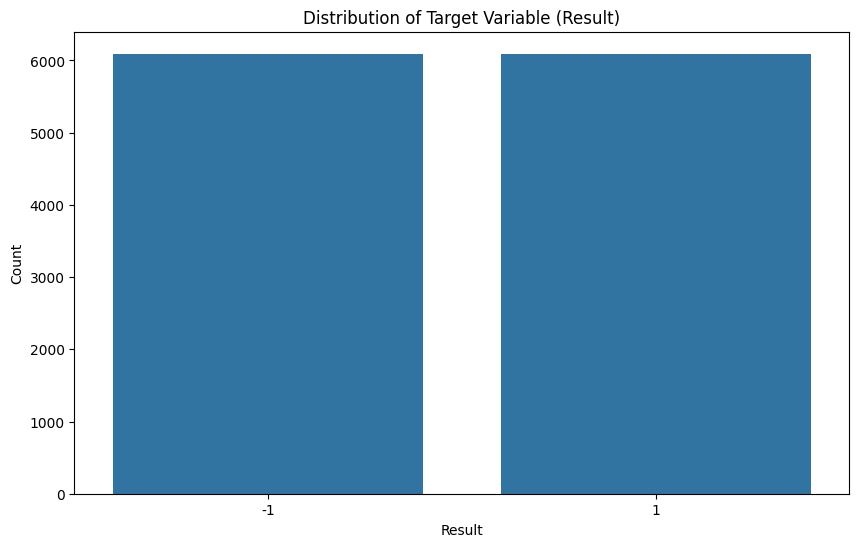

In [ ]:
y_df = pd.DataFrame({'Result' : y})
plt.figure(figsize=(10,6))
sns.countplot(data=y_df, x =y_df['Result'])
plt.title('Distribution of Target Variable (Result)')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

After applying SMOTE, this plot confirms the balanced distribution of classes.



# **Feature Correlation Analysis**

<Figure size 600x400 with 0 Axes>

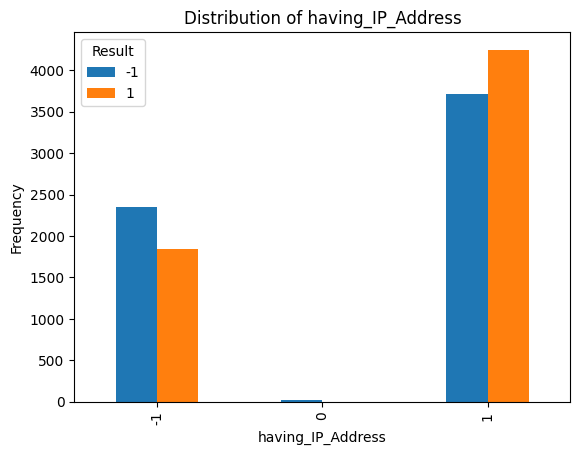

<Figure size 600x400 with 0 Axes>

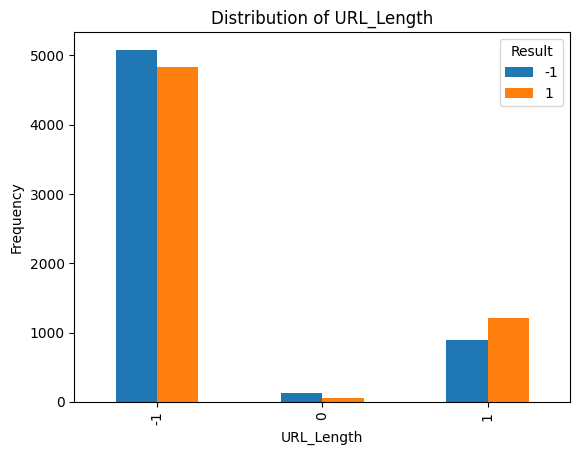

<Figure size 600x400 with 0 Axes>

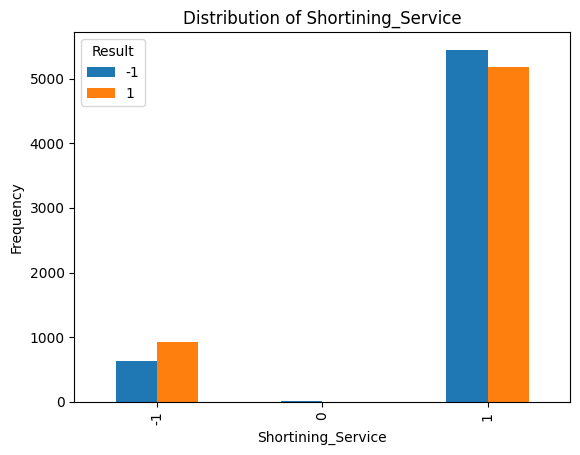

<Figure size 600x400 with 0 Axes>

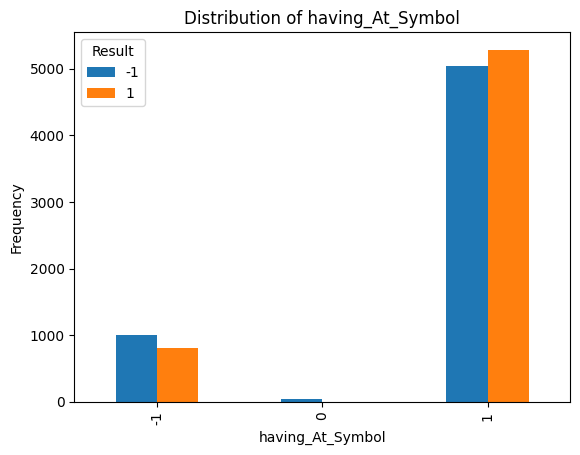

<Figure size 600x400 with 0 Axes>

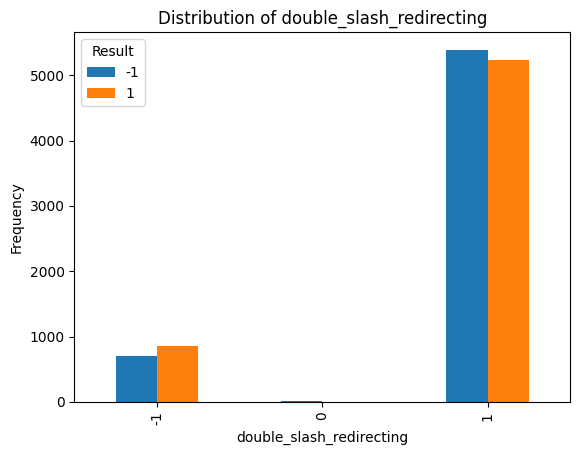

<Figure size 600x400 with 0 Axes>

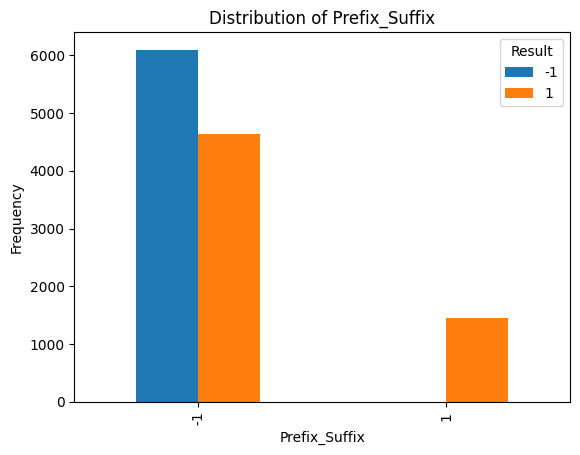

<Figure size 600x400 with 0 Axes>

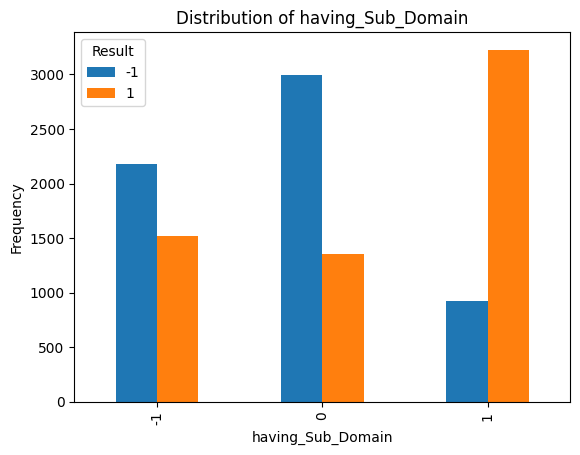

<Figure size 600x400 with 0 Axes>

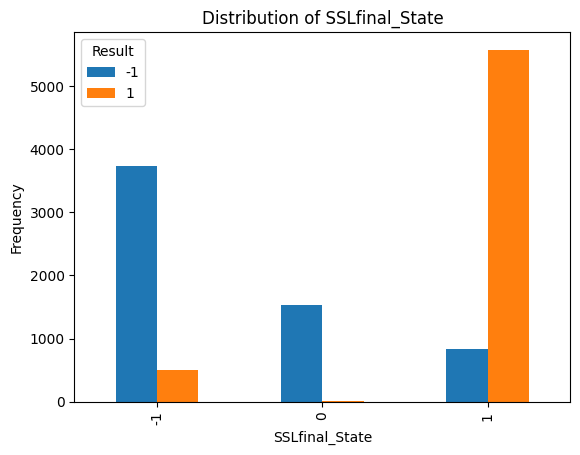

<Figure size 600x400 with 0 Axes>

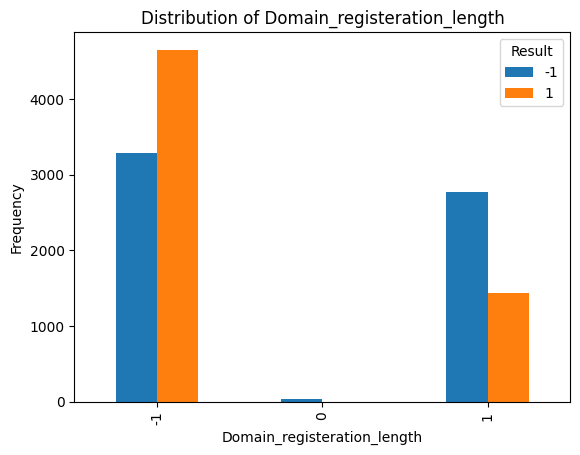

<Figure size 600x400 with 0 Axes>

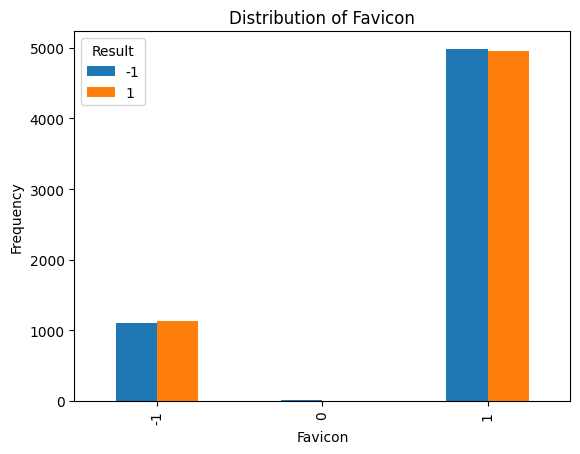

<Figure size 600x400 with 0 Axes>

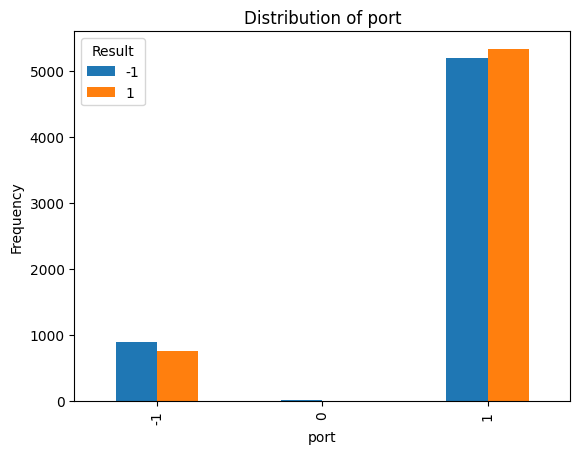

<Figure size 600x400 with 0 Axes>

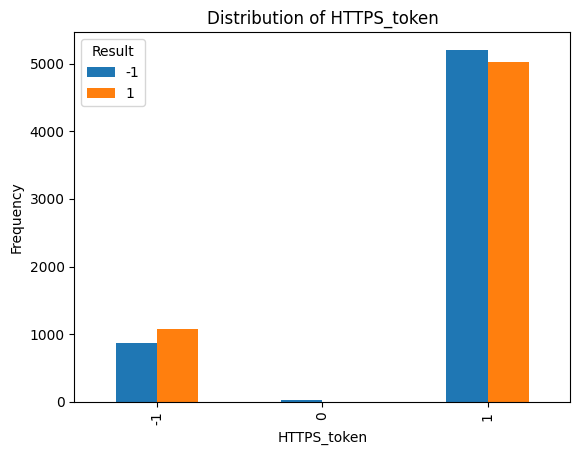

<Figure size 600x400 with 0 Axes>

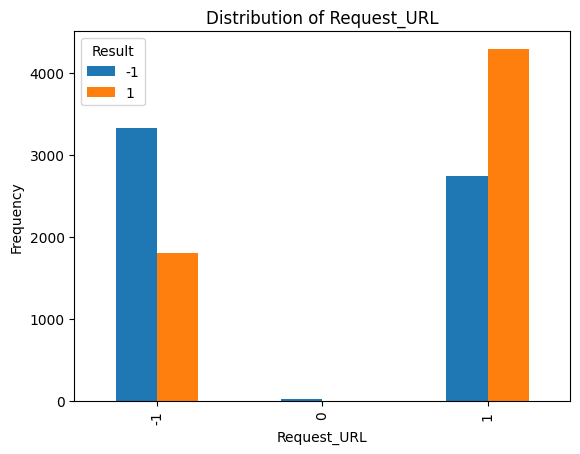

<Figure size 600x400 with 0 Axes>

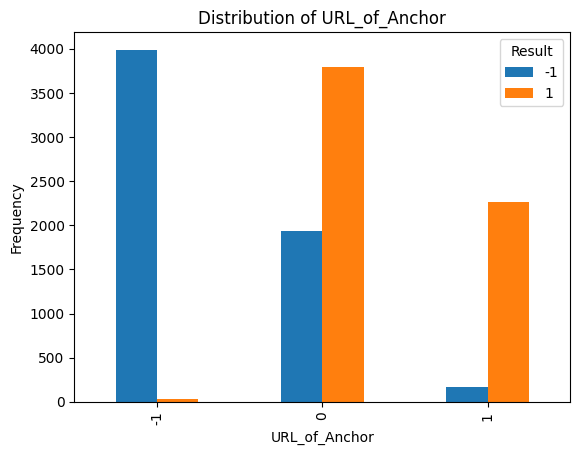

<Figure size 600x400 with 0 Axes>

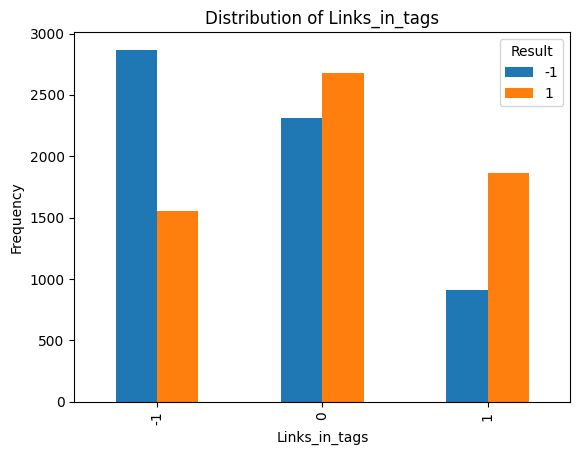

<Figure size 600x400 with 0 Axes>

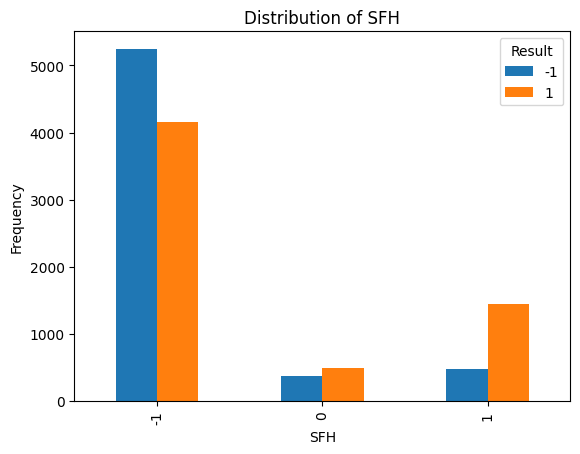

<Figure size 600x400 with 0 Axes>

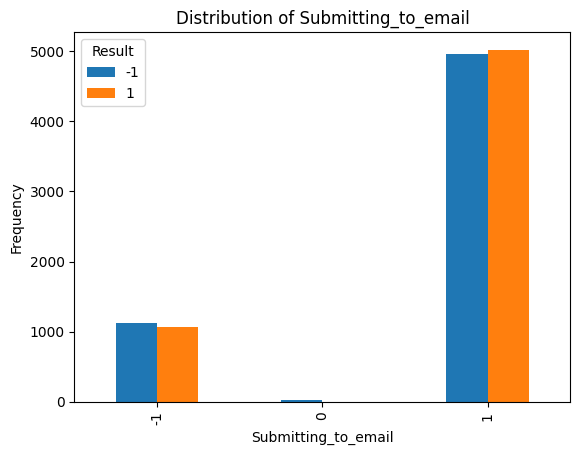

<Figure size 600x400 with 0 Axes>

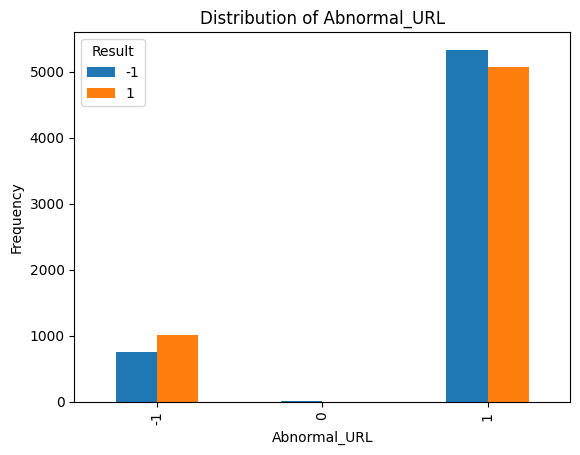

<Figure size 600x400 with 0 Axes>

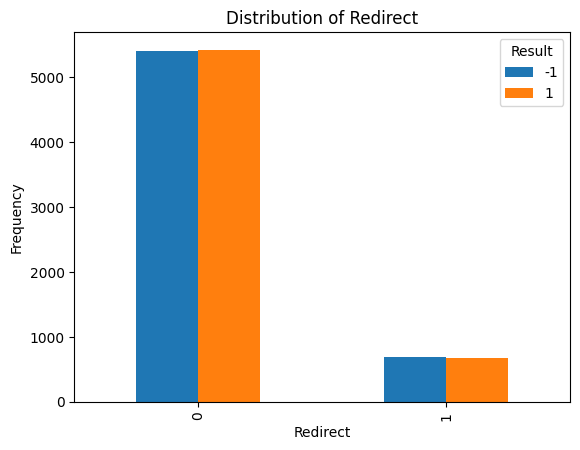

<Figure size 600x400 with 0 Axes>

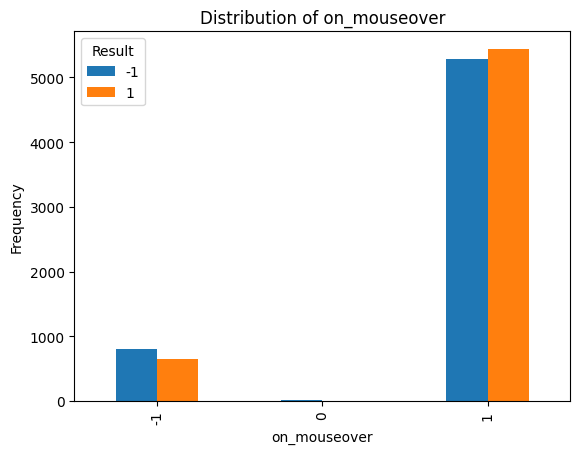

<Figure size 600x400 with 0 Axes>

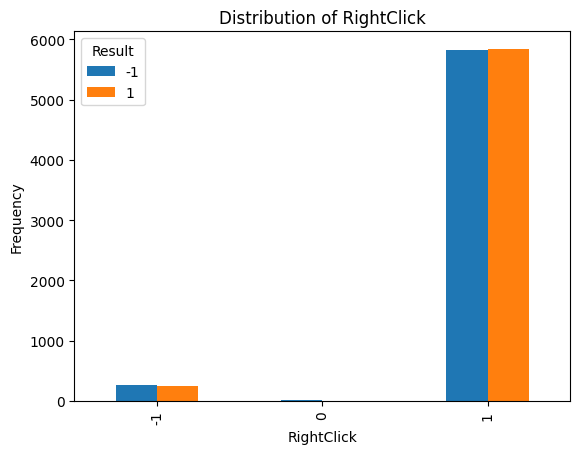

<Figure size 600x400 with 0 Axes>

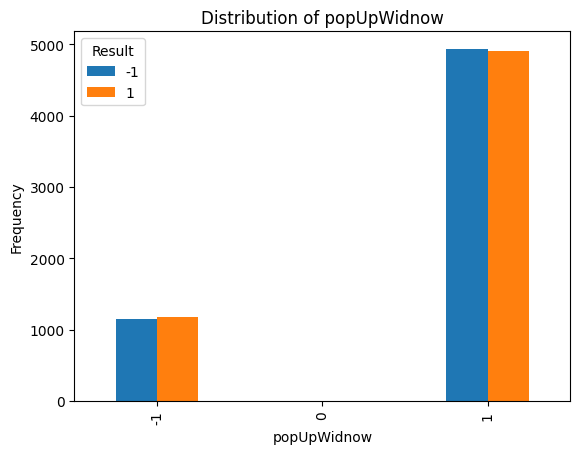

<Figure size 600x400 with 0 Axes>

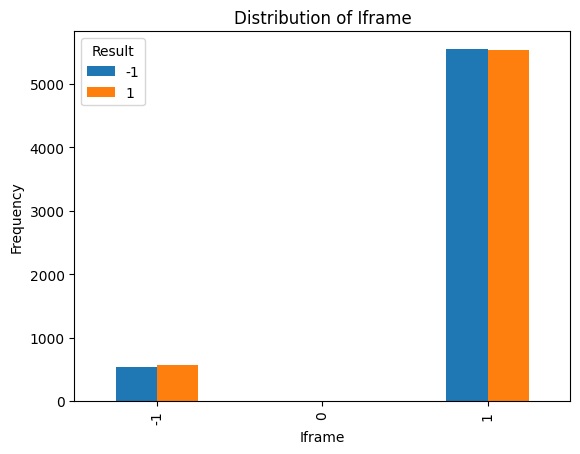

<Figure size 600x400 with 0 Axes>

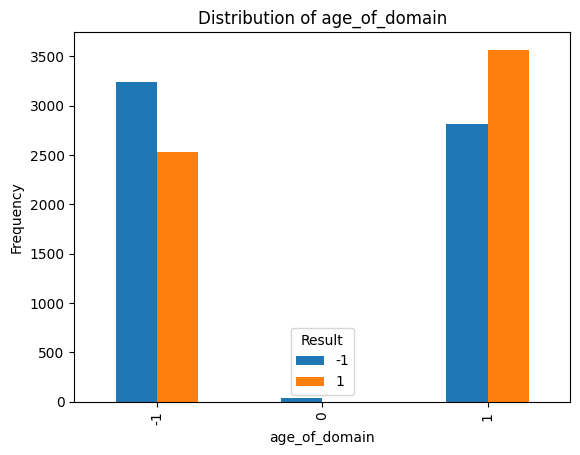

<Figure size 600x400 with 0 Axes>

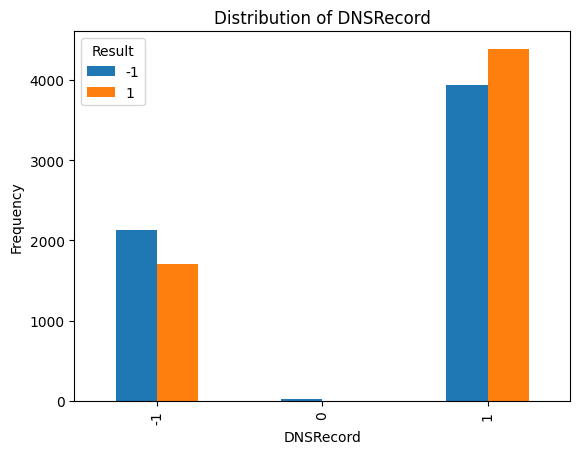

<Figure size 600x400 with 0 Axes>

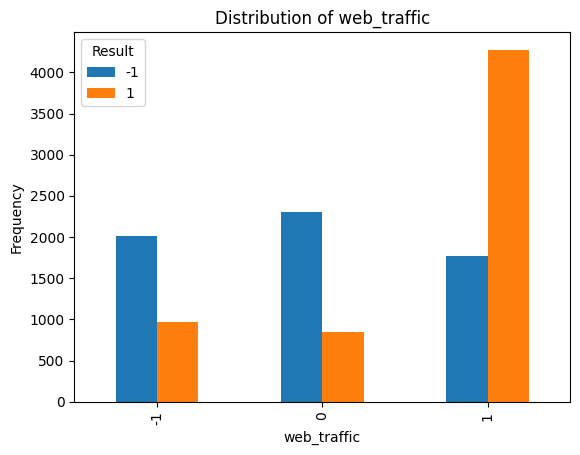

<Figure size 600x400 with 0 Axes>

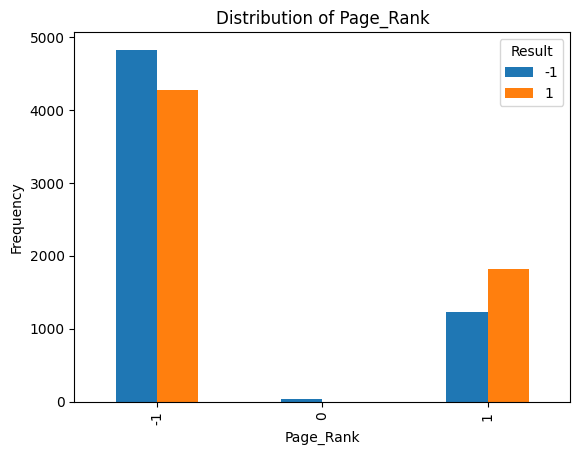

<Figure size 600x400 with 0 Axes>

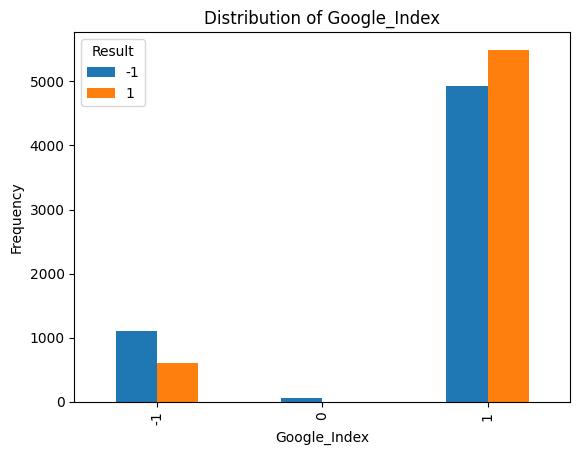

<Figure size 600x400 with 0 Axes>

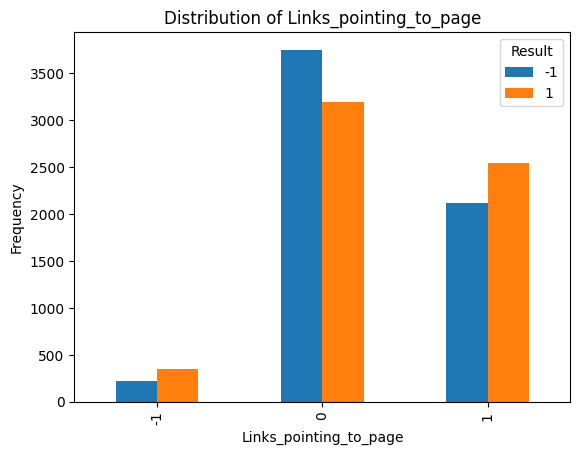

<Figure size 600x400 with 0 Axes>

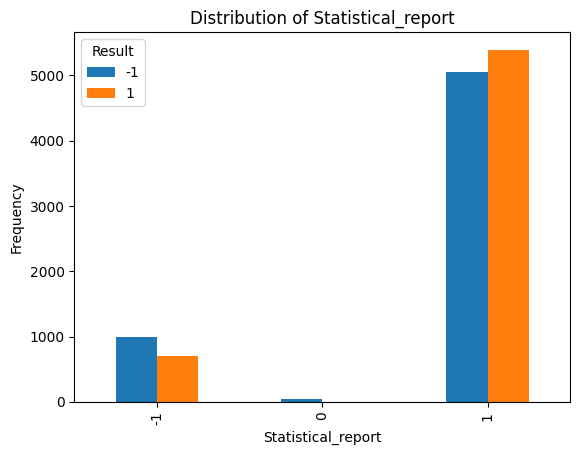

In [ ]:
for column in x.columns:
  plt.figure(figsize=(6,4))
  pd.crosstab(x[column],y).plot(kind='bar')
  plt.title(f'Distribution of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()

Correlation analysis shows the relationship between features and the target variable. Strongly correlated features (either positively or negatively) are potentially more informative, while weakly correlated features may be less useful or even redundant.

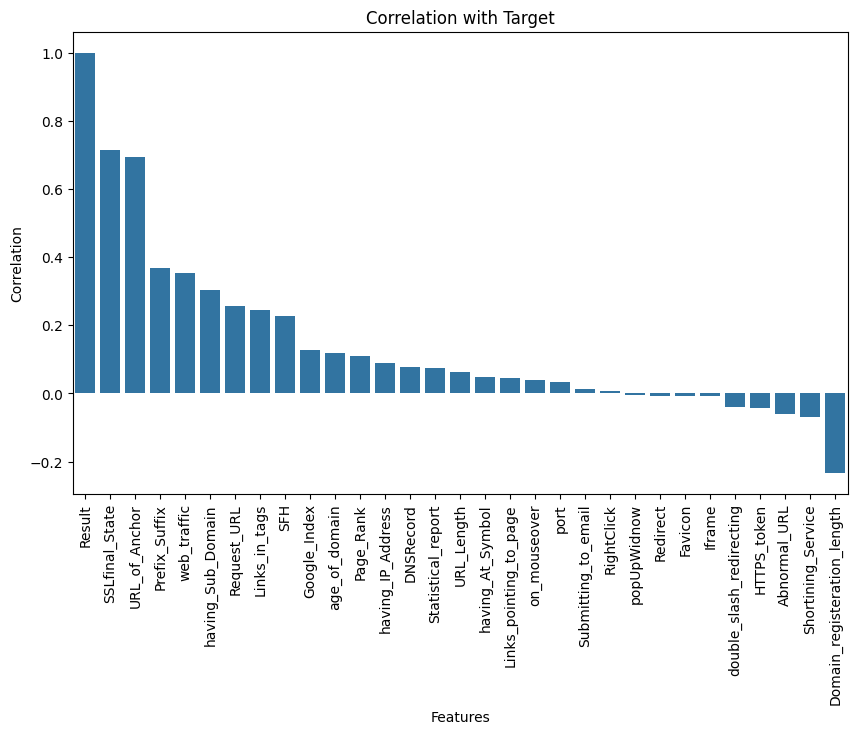

In [ ]:
df = pd.concat([x,y],axis=1)
correlation_with_target = df.corr()['Result'].sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=correlation_with_target.index,y=correlation_with_target.values)
plt.title('Correlation with Target')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Correlation')
plt.show()

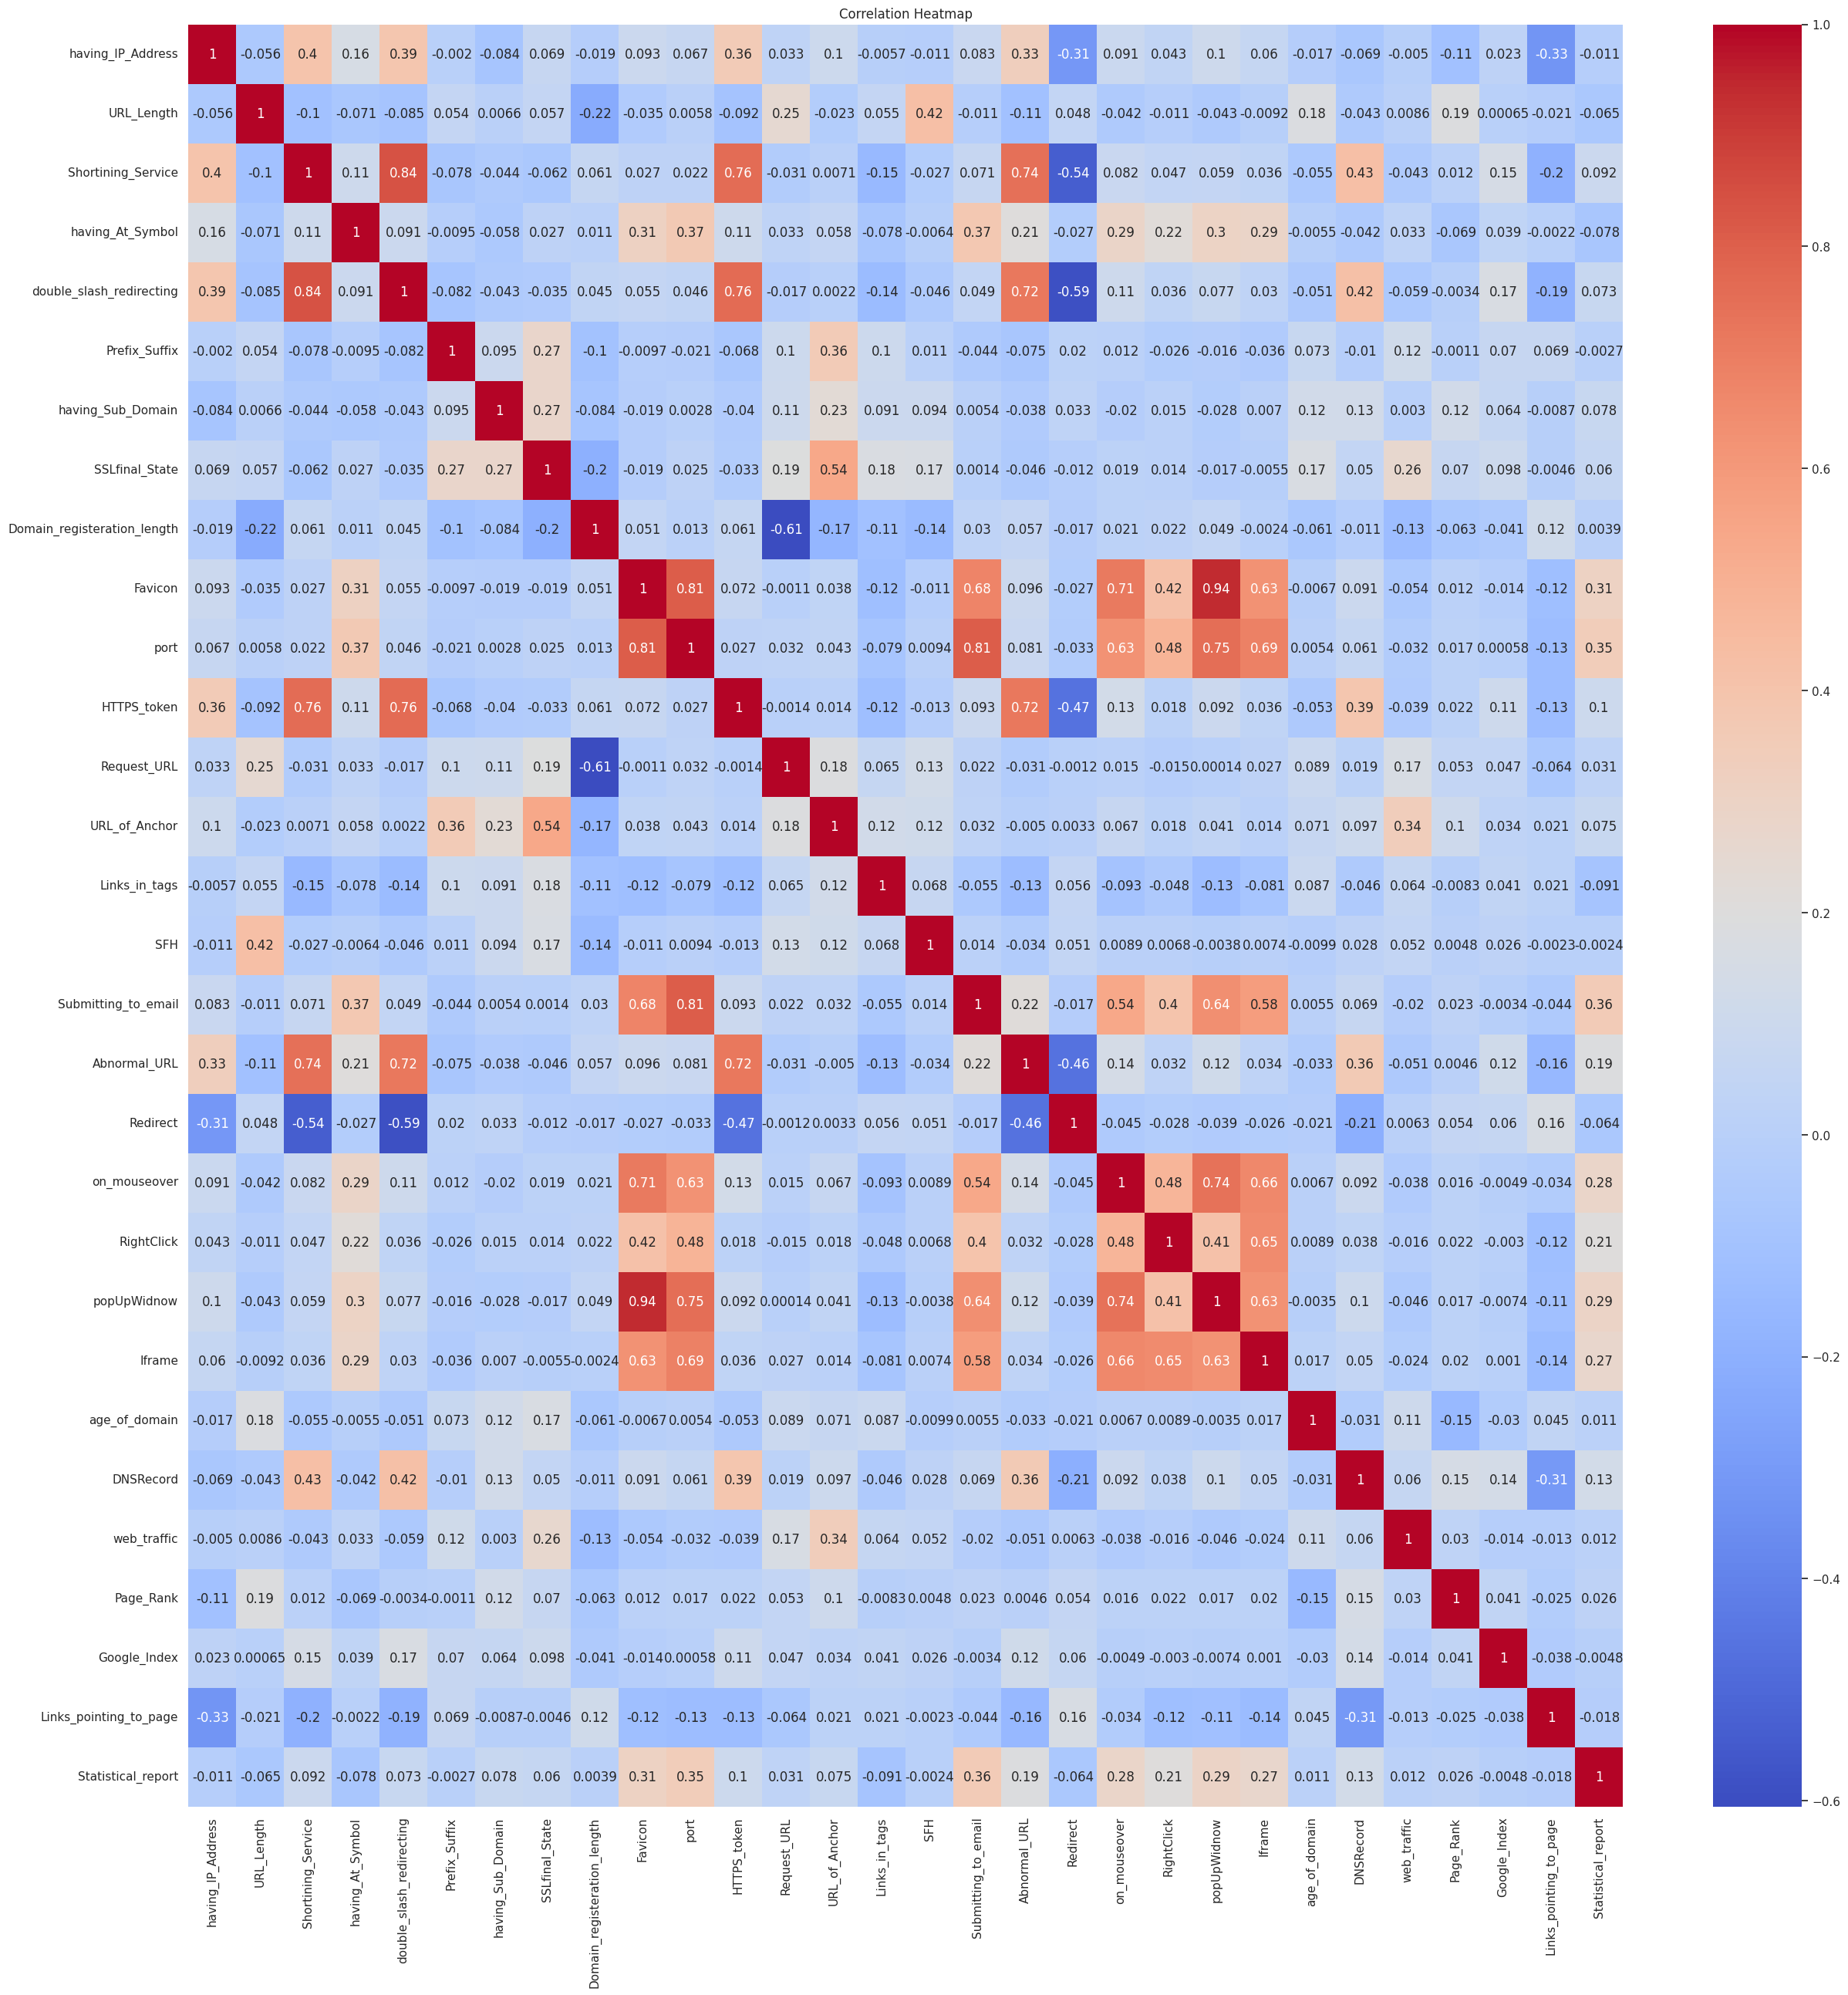

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(30,30))
sns.heatmap(x.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

This heatmap displays correlations between features, helping identify redundant features or multicollinearity issues.

Note that feature popUpWindow and favicon are highly correlated. Looking at the definitions of these features from the Data description, we can say that, for websites where favicon is loaded from external links the pop-up window mostly contains text field. This is said just by seeing the high correlation. Dropping one of the features or not is an experimental decision.
Note that some features are negatively correlated but the color index minimum correlation is upto -0.6. Negative correlations are where one feature marks it as phishing and other don't.

In [ ]:
x.drop('Favicon',axis=1,inplace=True)

The Favicon feature is dropped because it has high correlation with another feature and might be redundant.

# **Feature Importance:**


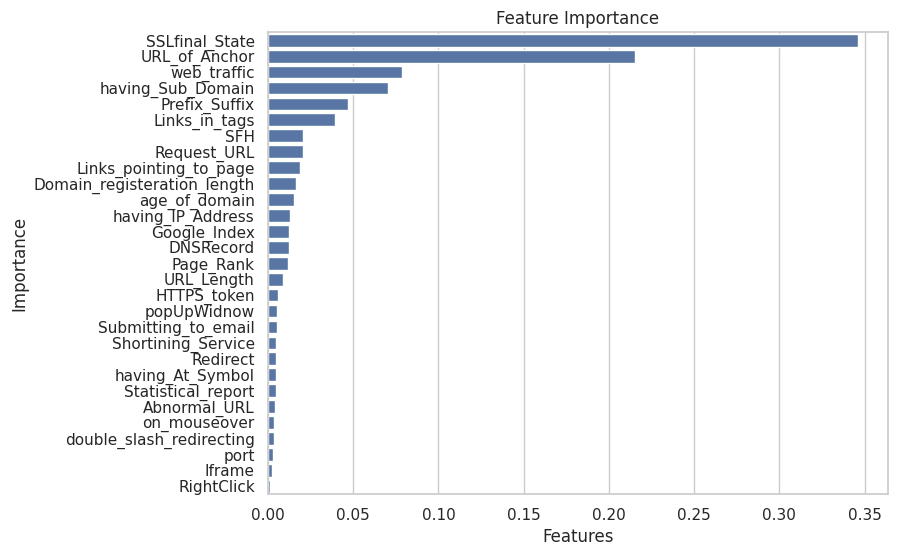

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(x,y)
feature_importance = pd.DataFrame(rf_model.feature_importances_,index=x.columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(y=feature_importance.index,x=feature_importance['Importance'])
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

   * A Random Forest model is trained on the dataset.
   * Feature importance is extracted from the trained model.  This helps determine which features are most predictive of the target variable (i.e., which features are most important in distinguishing between phishing and legitimate websites).
   * The code then visualizes the feature importances with a bar chart.

# **Feature Selection (Optional):**

In [ ]:
thresholds = [0.01]
for threshold in thresholds:
    selected_features = feature_importance[feature_importance['Importance'] >= threshold].index
    data_selected = pd.concat([x[selected_features], y], axis=1)
    print(f"Number of features selected with threshold {threshold}: {len(selected_features)}")
    print(f'Number of features that have low importance: {len(feature_importance[feature_importance["Importance"] <= threshold].index)}')

Number of features selected with threshold 0.01: 15
Number of features that have low importance: 14


   * This section explores potentially removing features that have low importance. However, the code notes that it might be better to keep all features because each feature in the phishing detection dataset likely contributes unique information, and removing some could hurt accuracy.


In [ ]:
y = pd.DataFrame(y, columns=['Result'])
y['Result'] = np.where(y['Result'] == -1, 0, y['Result'])
y['Result'].unique()
y = y.values.ravel()

   * The target variable Result is transformed. Previously, phishing sites had a value of -1, but it is changed to 0 for easier handling.


# **Train-Test Split:**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

   * The dataset is split into training and testing sets. The model will be trained on the training data and evaluated on the unseen test data.


In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8530, 29), (3656, 29), (8530,), (3656,))

# **MODEL SELECTION AND MODELING**

* **1 Random Forest**
* Random Forest is an ensemble of multiple decision trees. Each tree is trained on random subsets of the data, and the model combines their predictions to make a final decision. This "voting" approach helps improve accuracy and reduces the risk of overfitting.
* Random Forest can handle a wide range of data types, including binary values. With binary features, it can efficiently split data at each node to determine the best split for classification, making it useful for high-dimensional data like yours.
* **2 Support Vector Machine (SVM)**
* SVM finds the best boundary (or hyperplane) that separates different classes in the data. In a binary setting, it tries to maximize the margin between data points of different classes.
* SVM is robust in distinguishing classes even with complex patterns, and it performs well with binary data. It’s particularly useful when the classes are well-separated and works best with standardized or scaled data.
* **3 Decision Tree**
* Decision Trees split the data at various nodes based on feature values to classify it. They work by asking a sequence of questions about the data, leading to a classification label at each "leaf" of the tree.
* Decision Trees handle binary values very well by making straightforward "yes/no" splits, which suits binary features. They are easy to interpret, making it clear how the model decides on phishing vs. non-phishing predictions.
* **4 XGBoost (Extreme Gradient Boosting)**
* XGBoost is an advanced ensemble model that builds multiple weak learners (often decision trees) sequentially, with each new tree aiming to correct the errors of the previous one.
* It is highly efficient with binary data and can capture complex patterns by adjusting the tree structure. XGBoost uses gradient boosting, which helps improve accuracy and reduces errors over each iteration. XGBoost is particularly effective for large datasets and high-dimensional binary data, making it suitable for classification tasks like phishing detection, as it balances both accuracy and efficiency.
* **5. Naive Bayes**
* Naive Bayes is a probabilistic classifier based on Bayes’ theorem, assuming that features are independent of each other within each class. Despite its simplicity, Naive Bayes is highly effective with binary data, especially in cases where independence assumptions are nearly valid. It calculates the probability that a given sample belongs to a class based on feature values, classifying it accordingly.
* Naive Bayes is computationally efficient and performs well with high-dimensional binary data, making it a good choice for text and binary features in phishing classification.
* **6. Logistic Regression**
* Logistic Regression is a linear model that estimates the probability of a binary outcome by fitting data to a logistic function. It predicts a probability score, which is then used to classify a sample into one of two categories.
* Logistic Regression is well-suited to binary classification tasks, especially when the relationship between features and the target variable is mostly linear. It performs well with binary data and is often used as a benchmark model in binary classification. This model is interpretable and computationally efficient, making it a solid choice for phishing detection where understanding the impact of each feature on predictions is essential.

# **Cross-Validation & Model Evaluation Using Pipelines**

StratifiedKFold is a type of cross-validation that maintains the class distribution of the target variable across each fold, which is useful in cases with imbalanced classes, such as in a binary classification problem.

Pipeline is a streamlined sequence of steps that automates data preprocessing and model training, ensuring consistent and efficient application of transformations (like scaling) and model fitting across training and testing datasets.

In [ ]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
models ={'RandomForest' : Pipeline(steps=[('scaler',StandardScaler()),('model',RandomForestClassifier())]),
          'SVC' : Pipeline(steps=[('scaler',StandardScaler()),('model',SVC())]),
          'DecisionTree' : Pipeline(steps=[('scaler',StandardScaler()),('model',DecisionTreeClassifier())]),
          'Naive Bayes': Pipeline(steps=[('scaler',StandardScaler()),('model',GaussianNB())]),
          'XGBoost' : Pipeline(steps=[('scaler',StandardScaler()),('model',XGBClassifier())]),
          'LogisticRegression' : Pipeline(steps=[('scaler',StandardScaler()),('model',LogisticRegression())])
          }

skf_results = {}
model_data = []

for model_name, model_Pipeline in models.items():
  scores = cross_val_score(model_Pipeline,x_train,y_train,cv=skf,scoring='accuracy')
  skf_results[model_name] = {
      'Mean Accuracy' : scores.mean(),
      'Standard Deviation' : scores.std()
  }

  model_data.append({
      'Model Name' : model_name,
      'Mean Accuracy' : scores.mean(),
      'Standard Deviation' : scores.std()
  })

model_df = pd.DataFrame(model_data,columns=['Model Name', 'Mean Accuracy', 'Standard Deviation'])

In [ ]:
model_df

,Model Name,Mean Accuracy,Standard Deviation
0,RandomForest,0.971395,0.001793
1,SVC,0.951465,0.000684
2,DecisionTree,0.959672,0.002784
3,Naive Bayes,0.640094,0.008874
4,XGBoost,0.970809,0.001941
5,LogisticRegression,0.927081,0.004105


In this step using pipelines with Stratified K-Fold cross-validation to evaluate several models for phishing detection.

Each pipeline combines scaling and modeling steps for each classifier, which keeps our code clean and ensures data is scaled only on the training set within each cross-validation fold. Scaling is especially useful for models like SVM and Logistic Regression, which perform better with standardized data.

Stratified K-Fold cross-validation divides the data into equal parts while keeping the phishing and non-phishing cases balanced in each fold. This helps evaluate each model's accuracy more reliably, especially when classes are imbalanced.

Testing six models: Random Forest, SVM, Decision Tree, Naive Bayes, XGBoost, and Logistic Regression. For each, we calculate the average accuracy and standard deviation, which gives us an idea of how stable and accurate each model is across the different data splits. This setup allows us to compare model performance in a consistent way.

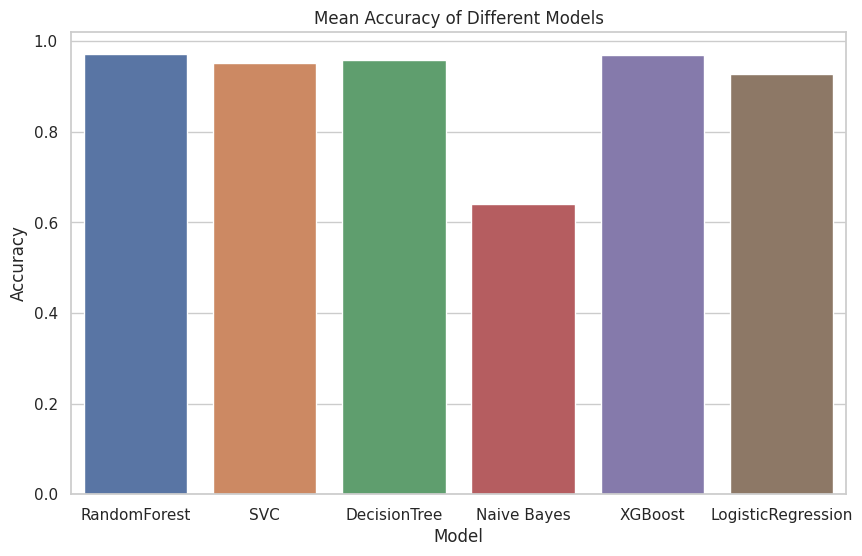

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Model Name',y='Mean Accuracy',data=model_df,hue='Model Name')
plt.title('Mean Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

Here we can see RandomForest and XGBoost are the top performers, with both high accuracy and consistency. Naive Bayes, while a quick and simple model, is not as effective here, likely due to the complexity or feature distribution in the dataset.

# **Hyperparameter Turning**

Hyperparameter tuning is the process of optimizing a model’s settings (parameters set before training) to improve its performance on the data.

In [ ]:
rf_parameters = {
    'model__n_estimators': [100, 200,300],
    'model__max_depth': [None, 10,20,30],
    'model__min_samples_split': [2, 5,10],
    'model__min_samples_leaf': [1, 2,4 ],
    'model__bootstrap': [True, False]
}

svc_parametrs = {
    'model__C' : [0.1,1],
    'model__kernel' : ['linear','rbf'],
    'model__gamma' : ['scale','auto']
}

dt_paramters = {
    'model__criterion' : ['gini', 'entropy'],
    'model__max_depth': [None, 10,20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2 ],
}

xgb_parameters = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.1],
    'model__max_depth': [3, 4, 6, 8],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0],
    'model__gamma': [0, 1, 2],
    'model__min_child_weight': [1, 2],
    'model__scale_pos_weight': [1, 2]

}

lr_parameters = {
    'model__C' : [0.01,0.1,1],
    'model__penalty' : ['l1','l2'],
    'model__solver' : ['liblinear','saga'],
}


model_parameters = {
    'RandomForest' : rf_parameters,
    'SVC' : svc_parametrs,
    'DecisionTree' : dt_paramters,
    'XGBoost' : xgb_parameters,
    'LogisticRegression' : lr_parameters

}

subset_size = int(0.5 * len(x_train))
x_train_subset = x_train[:subset_size]
y_train_subset = y_train[:subset_size]

best_models = {}
for model_name,parameters in model_parameters.items():
  grid_search = GridSearchCV(models[model_name],parameters,cv=2,scoring='accuracy',n_jobs=1)

  grid_search.fit(x_train_subset,y_train_subset)
  best_models[model_name] = grid_search.best_estimator_
  print(f'Best parameters for {model_name} : {grid_search.best_params_}')

print()
for name,model in best_models.items():
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred)
  print(f'{name}  {accuracy}')

Best parameters for RandomForest : {'model__bootstrap': False, 'model__max_depth': 30, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Best parameters for SVC : {'model__C': 1, 'model__gamma': 'scale', 'model__kernel': 'rbf'}
Best parameters for DecisionTree : {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
Best parameters for XGBoost : {'model__colsample_bytree': 1.0, 'model__gamma': 0, 'model__learning_rate': 0.1, 'model__max_depth': 8, 'model__min_child_weight': 1, 'model__n_estimators': 200, 'model__scale_pos_weight': 2, 'model__subsample': 0.8}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters for LogisticRegression : {'model__C': 0.1, 'model__penalty': 'l2', 'model__solver': 'liblinear'}

RandomForest  0.9595185995623632
SVC  0.9411925601750547
DecisionTree  0.9411925601750547
XGBoost  0.962800875273523
LogisticRegression  0.9212253829321663


In [ ]:
from math import gamma
models = {
    'RandomForest' : RandomForestClassifier(n_estimators=200,min_samples_split=5,min_samples_leaf=1,max_depth=30,bootstrap=False),
    'DecisionTree' : DecisionTreeClassifier(criterion="entropy",max_depth=None,min_samples_leaf=1,min_samples_split=2),
    'SVC' : SVC(C=1,gamma="scale",kernel="rbf"),
    'XGBoost' : XGBClassifier(colsample_bytree=0.8,gamma=0,learning_rate=0.1,max_depth=8,min_child_weight=2,n_estimators=300,scale_pos_weight=2,subsample=0.8),
    'LogisticRegression' : LogisticRegression(C=1,penalty="l2",solver="liblinear")
    }


The below code will be evaluates multiple models, comparing their accuracy and visualizing their confusion matrices to help analyze model performance.

RandomForest  0.9745623632385121

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1843
           1       0.97      0.98      0.97      1813

    accuracy                           0.97      3656
   macro avg       0.97      0.97      0.97      3656
weighted avg       0.97      0.97      0.97      3656




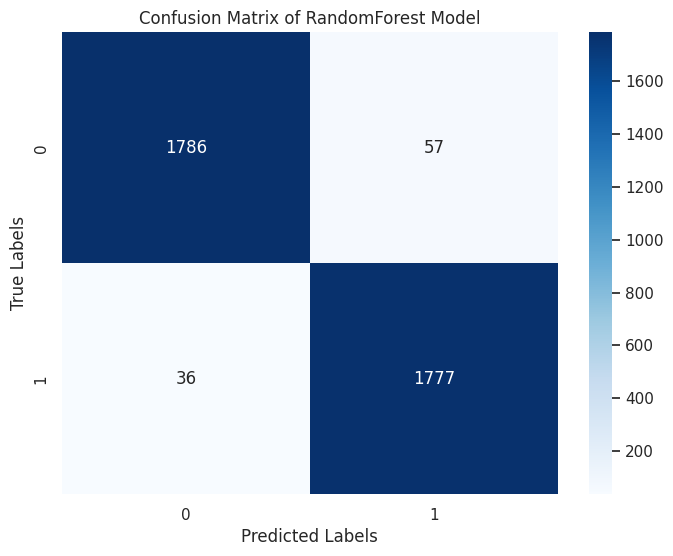



DecisionTree  0.962527352297593

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1843
           1       0.96      0.97      0.96      1813

    accuracy                           0.96      3656
   macro avg       0.96      0.96      0.96      3656
weighted avg       0.96      0.96      0.96      3656




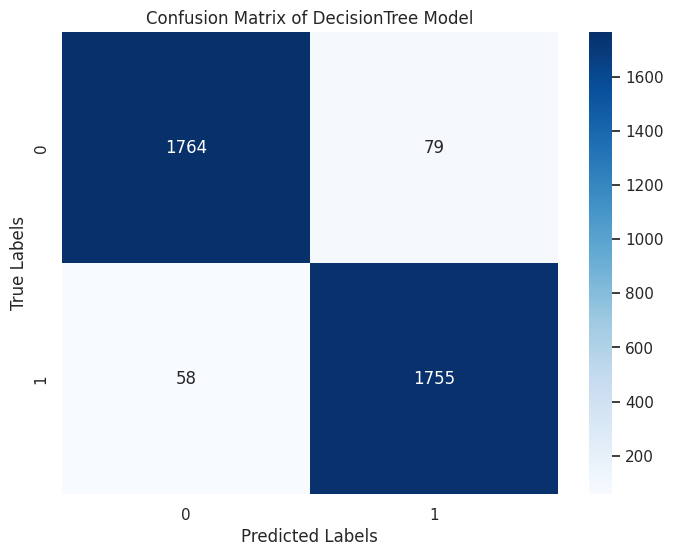



SVC  0.9480306345733042

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1843
           1       0.94      0.96      0.95      1813

    accuracy                           0.95      3656
   macro avg       0.95      0.95      0.95      3656
weighted avg       0.95      0.95      0.95      3656




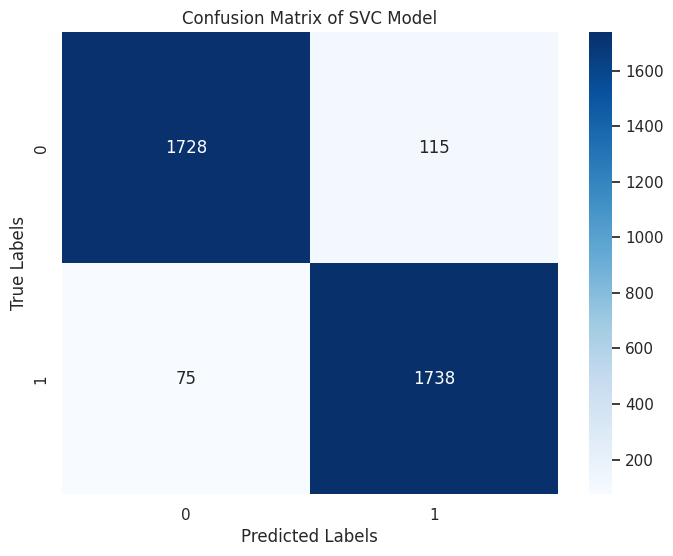



XGBoost  0.9726477024070022

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1843
           1       0.96      0.98      0.97      1813

    accuracy                           0.97      3656
   macro avg       0.97      0.97      0.97      3656
weighted avg       0.97      0.97      0.97      3656




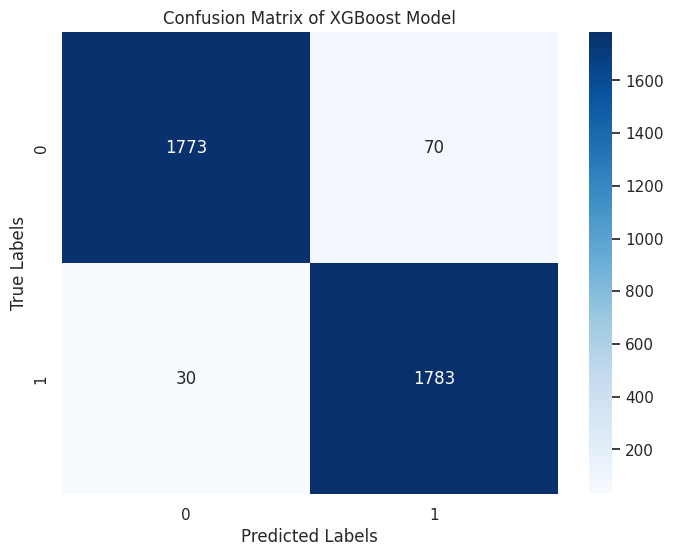



LogisticRegression  0.9217724288840262

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1843
           1       0.91      0.93      0.92      1813

    accuracy                           0.92      3656
   macro avg       0.92      0.92      0.92      3656
weighted avg       0.92      0.92      0.92      3656




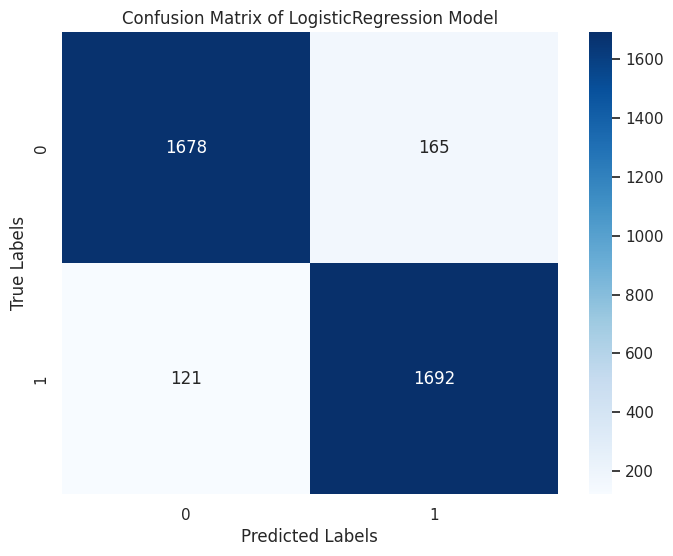

In [ ]:
model = {}
accuracy_list = []
for name,model in models.items():
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred)
  accuracy_list.append({f'Model Name' : name , 'Accuracy' : accuracy})
  print(f'{name}  {accuracy}')
  print()
  print(classification_report(y_test,y_pred))
  print()
  plt.figure(figsize=(8,6))
  cm = confusion_matrix(y_test,y_pred)
  sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
  plt.title(f'Confusion Matrix of {name} Model')
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.show()
  print()
  print()



The matrix provides a summary of the classifier's performance by showing the count of correct and incorrect predictions for each class.



In [ ]:
accuracy_df = pd.DataFrame(accuracy_list)
accuracy_df

,Model Name,Accuracy
0,RandomForest,0.974562
1,DecisionTree,0.962527
2,SVC,0.948031
3,XGBoost,0.972648
4,LogisticRegression,0.921772


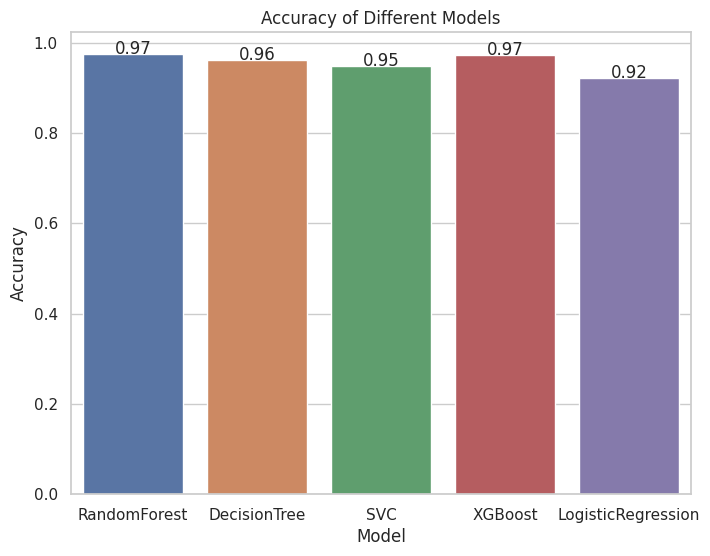

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='Model Name',y='Accuracy',data=accuracy_df,hue='Model Name')
for index,row in accuracy_df.iterrows():
    plt.text(row.name,row['Accuracy'],str(round(row['Accuracy'],2)),ha='center')
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

The RandomForestClassifier model performs exceptionally well for the phishing detection task, achieving high scores in precision, recall, and F1-score across both classes.

Correct Classifications: The model accurately identified 1,786 legitimate websites (class 0) and 1,776 phishing websites (class 1).
Misclassifications: It made 57 errors by incorrectly classifying legitimate websites as phishing and 37 errors the other way around.
Classification Report Summary:
Precision:

Class 0 (Non-phishing): 0.97 - Of all instances predicted as legitimate, 97% were correct.
Class 1 (Phishing): 0.97 - Of all instances predicted as phishing, 97% were accurate.
Recall:

Class 0: 0.97 - The model correctly identified 97% of all legitimate websites.
Class 1: 0.97 - It successfully detected 97% of all phishing websites.
F1-Score:

Class 0: 0.97 - Shows a strong balance between precision and recall for legitimate websites.
Class 1: 0.97 - Similarly high balance for phishing websites.
Overall Accuracy: The model achieved 97% accuracy, indicating a high rate of correct predictions across both classes.

# **Saving the best model**

In [ ]:
best_model = models['RandomForest']
model_filename = '/content/drive/My Drive/phishing_detection_model.joblib'
joblib.dump(best_model, model_filename)

['/content/drive/My Drive/phishing_detection_model.joblib']

# **Unseendata Prediction**

In [ ]:
unseen_df.shape

(108, 31)

In [ ]:
unseen_df.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [ ]:
unseen_df.drop(['Result','Favicon'],axis=1,inplace=True)

In [ ]:
model = joblib.load('/content/drive/My Drive/phishing_detection_model.joblib')
predictions = model.predict(unseen_df)
print(predictions)

[0 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1
 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0]


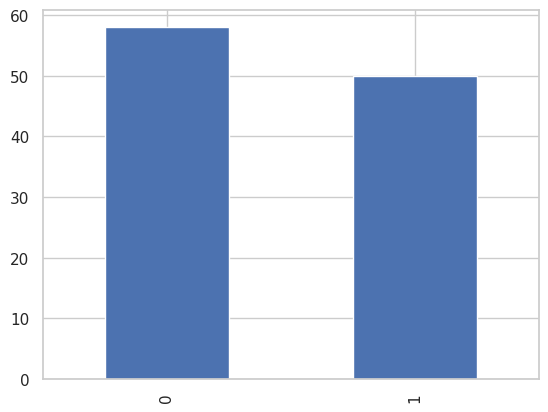

In [ ]:
pd.Series(predictions).value_counts().plot(kind='bar')
plt.show()

# **Conclusion**

This project successfully developed a robust phishing website detection model using machine learning techniques. Through a comprehensive analysis of various features, Then identified key factors that distinguish phishing websites from legitimate ones. Employing a range of classification models and evaluating their performance using techniques like cross-validation and hyperparameter tuning, then identified the Random Forest classifier as the optimal model. This model exhibited high accuracy and precision in correctly identifying both legitimate and phishing websites, ultimately providing a reliable solution for enhancing online security. The developed model can be utilized to safeguard users from potential online threats by effectively identifying phishing websites and mitigating the risks associated with them.
